In [1]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.macrotrends.net/countries/ranking/population-density')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table table-striped table-hover table-bordered" id="country_ranking">
<thead>
<tr>
<th style="text-align:left;">Country Name</th>
<th style="text-align:center;">2018</th>
<th style="text-align:center;">2017</th>
<th style="text-align:center;">2016</th>
<th style="text-align:center;">2015</th>
<th style="text-align:center;">2014</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left"><a href="/countries/MAC/macao/population-density">Macao</a></td>
<td style="text-align:right;">19,199</td>
<td style="text-align:right;">20,214</td>
<td style="text-align:right;">20,093</td>
<td style="text-align:right;">19,806</td>
<td style="text-align:right;">19,479</td>
</tr>
<tr>
<td style="text-align:left"><a href="/countries/MCO/monaco/population-density">Monaco</a></td>
<td style="text-align:right;">19,083</td>
<td style="text-align:right;">18,940</td>
<td style="text-align:right;">18,781</td>
<td style="text-align:right;">18,610</td>
<td style="text-align:right;">18,411</td>
</tr

In [2]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    table=[]
    for row in html.find_all('tr'):
        r=[]
        cells=row.find_all('td')
        
        if len(cells)==0:
            cells=row.find_all('th')
            
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

print(str(table)[:1000])

[['Country Name', '2018', '2017', '2016', '2015', '2014'], ['Macao', '19,199', '20,214', '20,093', '19,806', '19,479'], ['Monaco', '19,083', '18,940', '18,781', '18,610', '18,411'], ['Singapore', '7,953', '7,916', '7,909', '7,807', '7,715'], ['Hong Kong', '7,096', '7,040', '6,987', '6,944', '6,885'], ['Gibraltar', '3,372', '3,372', '3,374', '3,374', '3,373'], ['Bahrain', '2,012', '1,915', '1,830', '1,763', '1,733'], ['Maldives', '1,719', '1,655', '1,585', '1,516', '1,450'], ['Malta', '1,514', '1,462', '1,423', '1,391', '1,358'], ['Bangladesh', '1,240', '1,227', '1,214', '1,200', '1,187'], ['Sint Maarten (Dutch Part)', '1,196', '1,193', '1,176', '1,142', '1,108'], ['Bermuda', '1,184', '1,183', '1,195', '1,208', '1,206'], ['Channel Islands', '861', '852', '843', '835', '829'], ['West Bank And Gaza', '759', '740', '725', '709', '693'], ['St. Martin (French Part)', '745', '731', '721', '717', '720'], ['Lebanon', '671', '667', '656', '639', '612'], ['Barbados', '667', '666', '665', '664', '

In [3]:
';'.join(table[0])

'Country Name;2018;2017;2016;2015;2014'

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('gdp.csv',table)

In [5]:
import pandas as pd
k=pd.read_csv('gdp.csv', delimiter=';')
k

,Country Name,2018,2017,2016,2015,2014
0,Macao,"19,199","20,214","20,093","19,806","19,479"
1,Monaco,"19,083","18,940","18,781","18,610","18,411"
2,Singapore,"7,953","7,916","7,909","7,807","7,715"
3,Hong Kong,"7,096","7,040","6,987","6,944","6,885"
4,Gibraltar,"3,372","3,372","3,374","3,374","3,373"
...,...,...,...,...,...,...
211,Australia,3,3,3,3,3
212,Namibia,3,3,3,3,3
213,Mongolia,2,2,2,2,2
214,Greenland,0,0,0,0,0


In [6]:
k['2018'].replace(',','', regex=True, inplace=True)
k['2017'].replace(',','', regex=True, inplace=True)
k['2016'].replace(',','', regex=True, inplace=True)
k['2015'].replace(',','', regex=True, inplace=True)
k['2014'].replace(',','', regex=True, inplace=True)
k

,Country Name,2018,2017,2016,2015,2014
0,Macao,19199,20214,20093,19806,19479
1,Monaco,19083,18940,18781,18610,18411
2,Singapore,7953,7916,7909,7807,7715
3,Hong Kong,7096,7040,6987,6944,6885
4,Gibraltar,3372,3372,3374,3374,3373
...,...,...,...,...,...,...
211,Australia,3,3,3,3,3
212,Namibia,3,3,3,3,3
213,Mongolia,2,2,2,2,2
214,Greenland,0,0,0,0,0


In [7]:
k['2018'] = k['2018'].apply(pd.to_numeric,errors='coerce')
k['2014'] = k['2014'].apply(pd.to_numeric,errors='coerce')
k

,Country Name,2018,2017,2016,2015,2014
0,Macao,19199,20214,20093,19806,19479
1,Monaco,19083,18940,18781,18610,18411
2,Singapore,7953,7916,7909,7807,7715
3,Hong Kong,7096,7040,6987,6944,6885
4,Gibraltar,3372,3372,3374,3374,3373
...,...,...,...,...,...,...
211,Australia,3,3,3,3,3
212,Namibia,3,3,3,3,3
213,Mongolia,2,2,2,2,2
214,Greenland,0,0,0,0,0


In [8]:
k.rename(columns = {'Country Name':'Land'}, inplace = True)
k

,Land,2018,2017,2016,2015,2014
0,Macao,19199,20214,20093,19806,19479
1,Monaco,19083,18940,18781,18610,18411
2,Singapore,7953,7916,7909,7807,7715
3,Hong Kong,7096,7040,6987,6944,6885
4,Gibraltar,3372,3372,3374,3374,3373
...,...,...,...,...,...,...
211,Australia,3,3,3,3,3
212,Namibia,3,3,3,3,3
213,Mongolia,2,2,2,2,2
214,Greenland,0,0,0,0,0


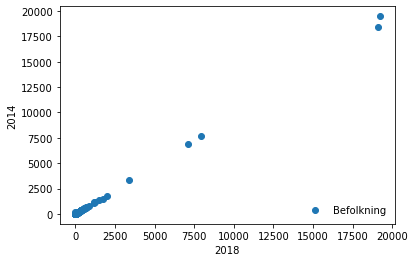

In [9]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

ax.set_ylabel('2014')
ax.set_xlabel('2018')

ax.scatter(k['2018'], k['2014'],  label='Befolkning')
ax.legend(loc='lower right',frameon=False)

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


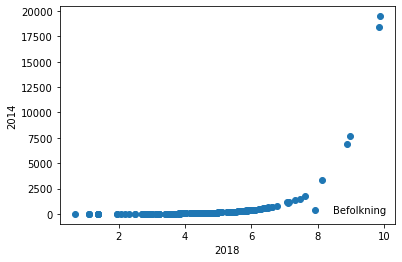

In [10]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('2014')
ax.set_xlabel('2018')

#plotting the function:
ax.scatter(np.log(k['2018']), k['2014'],  label='Befolkning')
ax.legend(loc='lower right',frameon=False)

In [11]:
k.assign(size = lambda k: k['2018'] - k['2014'])

,Land,2018,2017,2016,2015,2014,size
0,Macao,19199,20214,20093,19806,19479,-280
1,Monaco,19083,18940,18781,18610,18411,672
2,Singapore,7953,7916,7909,7807,7715,238
3,Hong Kong,7096,7040,6987,6944,6885,211
4,Gibraltar,3372,3372,3374,3374,3373,-1
...,...,...,...,...,...,...,...
211,Australia,3,3,3,3,3,0
212,Namibia,3,3,3,3,3,0
213,Mongolia,2,2,2,2,2,0
214,Greenland,0,0,0,0,0,0


In [12]:
'{:,}'.format(int(23153161365)).replace(',',' ')

'23 153 161 365'

In [62]:
from bokeh.plotting import figure
from bokeh.models import BoxZoomTool, PanTool, ResetTool

p = figure(
        title = "Endring i Befolkningstetthet 2014-2018",
        title_location = "below",
        x_axis_label = 'Befolkningstetthet 2018',
        y_axis_label = 'Befolkningstetthet 2014',
        x_range = (0, 500),
        y_range = (0, 500),
    
    
        tools="hover", 
        tooltips = [
            ("Land", "@Land"),
            ("Befolkningstetthet 2018","@2018"),
            ("Befolkningstetthet 2014","@2014")
            ],
        toolbar_location="below",
    
        plot_height = 600,
        plot_width = 1000)

In [64]:
from bokeh.io import show, output_notebook
from bokeh.plotting import output_file

p.scatter(
    source=k,
    x= '2014', 
    y= '2018',
    size = 20,
    color = 'Red',
    alpha= 0.6,
    )

p.background_fill_color = (0, 50, 200)
p.border_fill_color = (200, 204, 255)
p.outline_line_color = (0, 0, 255)

output_notebook()
output_file("density.html")
show(p)

Loading BokehJS ...